In [32]:
import pandas as pd
import nltk
from textblob import TextBlob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


In [33]:
data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\raw_analyst_ratings.csv")

In [34]:
data.rename(columns={"date": "Date"}, inplace=True)

In [35]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [36]:
data['Date'] = data['Date'].str.split(' ').str[0]


In [37]:
data.head()

,Unnamed: 0,headline,url,publisher,Date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


In [38]:

company_to_filter = 'AAPL'
data_filtered =data[data['stock'] == company_to_filter]

In [39]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL


In [40]:
# Function to get the sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [41]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL


In [42]:
data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)

C:\Users\befekadum\AppData\Local\Temp\ipykernel_35384\1231557142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.loc[:, 'sentiment'] = data_filtered['headline'].apply(get_sentiment)


In [43]:
data_filtered.head()

,Unnamed: 0,headline,url,publisher,Date,stock,sentiment
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,0.433333
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,0.000000
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,0.500000
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,0.000000
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,0.000000


In [44]:
data_filtered[['Date', 'headline', 'sentiment']].head()

,Date,headline,sentiment
6680,2020-06-10,Tech Stocks And FAANGS Strong Again To Start D...,0.433333
6681,2020-06-10,10 Biggest Price Target Changes For Wednesday,0.000000
6682,2020-06-10,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",0.500000
6683,2020-06-10,"Deutsche Bank Maintains Buy on Apple, Raises P...",0.000000
6684,2020-06-10,Apple To Let Users Trade In Their Mac Computer...,0.000000


In [45]:
new_data_filtered = data_filtered.loc[:, ['Date', 'sentiment']]
new_data_filtered.head()

,Date,sentiment
6680,2020-06-10,0.433333
6681,2020-06-10,0.000000
6682,2020-06-10,0.500000
6683,2020-06-10,0.000000
6684,2020-06-10,0.000000


In [46]:
stock_data = pd.read_csv(r"C:\Users\befekadum\Documents\10x acadamy\Week 1\project\week1\data\AAPL_historical_data.csv")

In [47]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [48]:
#stock_data= stock_data.index
new_stock_data=pd.DataFrame(stock_data, columns=['Date','Close'])

In [49]:
new_stock_data.head()

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862


In [50]:
#print(new_data_filtered['Date'].min(), new_data_filtered['Close'].max())
#print(stock_data.index.min(), stock_data.index.max())

In [51]:
print(new_stock_data.columns)

Index(['Date', 'Close'], dtype='object')


In [52]:
# Aligning sentiment scores with the stock closing prices on the same date
#new_data_filtered= 
#new_stock_data = 
combined_data= new_data_filtered.set_index('Date').join(new_stock_data.set_index('Date'))
#combined_data.head()

In [53]:
print(new_stock_data[['Close']])

            Close
0        0.128348
1        0.121652
2        0.112723
3        0.115513
4        0.118862
...           ...
10993  218.539993
10994  217.490005
10995  217.960007
10996  218.240005
10997  218.800003

[10998 rows x 1 columns]


In [54]:
combined_data.head()

,sentiment,Close
Date,,
2020-06-10,0.433333,88.209999
2020-06-10,0.000000,88.209999
2020-06-10,0.500000,88.209999
2020-06-10,0.000000,88.209999
2020-06-10,0.000000,88.209999


In [55]:
combined_data.tail()

,sentiment,Close
Date,,
2020-03-10,0.000000,71.334999
2020-03-10,0.000000,71.334999
2020-03-09,-0.466667,66.542503
2020-03-09,0.000000,66.542503
2020-03-09,0.000000,66.542503


In [56]:
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

C:\Users\befekadum\AppData\Local\Temp\ipykernel_35384\707584225.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [57]:
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'])
print("Correlation between sentiment and daily stock returns:", correlation)

Correlation between sentiment and daily stock returns: 0.12631069538019504


In [58]:
correlation = combined_data['sentiment'].corr(combined_data['Close'])
print("Correlation between sentiment and closing:", correlation)

Correlation between sentiment and closing: 0.05496089526508537


In [59]:
# Calculate daily returns (percentage change in closing price)
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

# Drop any rows with NaN values (e.g., the first row after pct_change)
#combined_data.dropna(inplace=True)

C:\Users\befekadum\AppData\Local\Temp\ipykernel_35384\3748235246.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  combined_data['Daily Returns'] = combined_data['Close'].pct_change()


In [60]:
correlation_matrix = combined_data.corr()

In [61]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
               sentiment     Close  Daily Returns
sentiment       1.000000  0.054961       0.126311
Close           0.054961  1.000000       0.027428
Daily Returns   0.126311  0.027428       1.000000


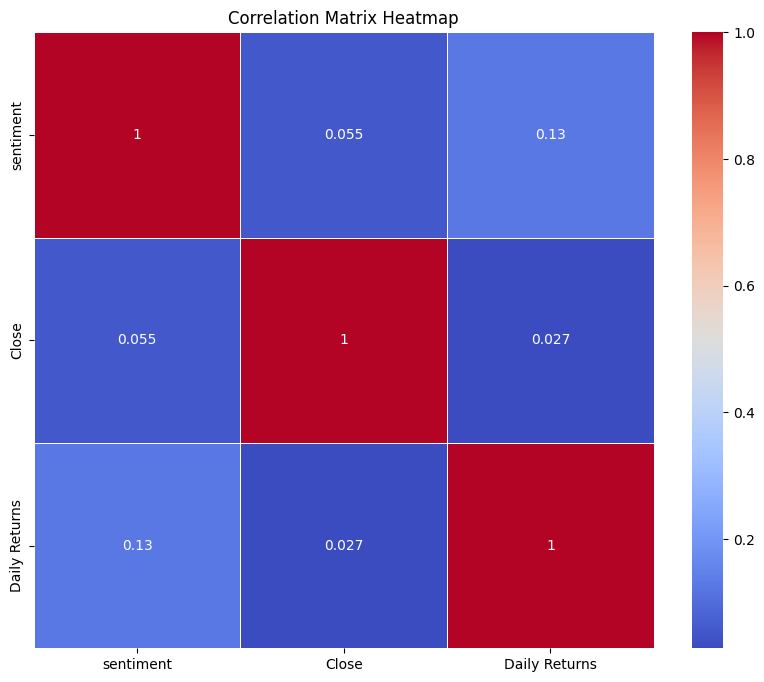

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()